In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("/content/inpatientCharges.csv")

In [20]:
df[['State_name', 'Region']] = df['Hospital Referral Region Description'].str.split('-', n=1, expand=True)

In [21]:
df[['DRG_code', 'Procedure_name']] = df['DRG Definition'].str.split(' - ', n=1, expand=True)

In [22]:
columns_to_drop = ['Provider Name', 'Provider Street Address', 'Provider City',
                   'Hospital Referral Region Description', 'DRG Definition']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [23]:
df[' Average Covered Charges '] = df[' Average Covered Charges '].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df[' Average Total Payments '] = df[' Average Total Payments '].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Average Medicare Payments'] = df['Average Medicare Payments'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

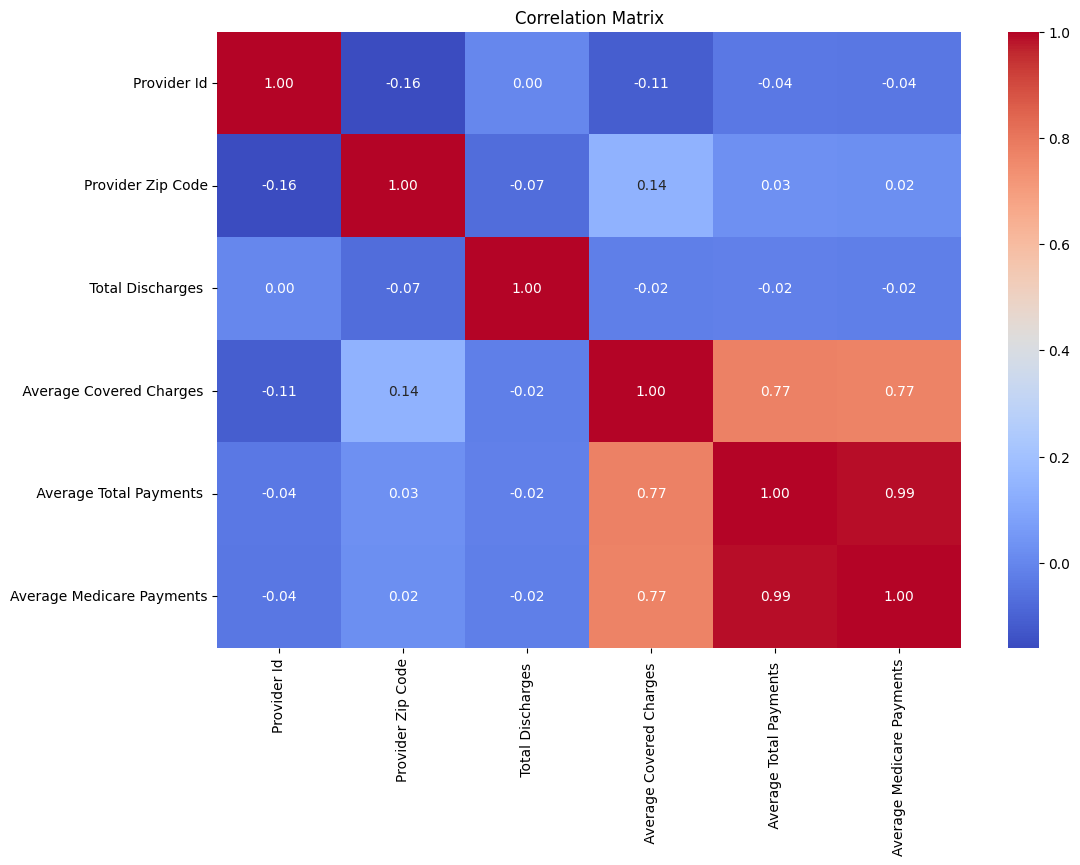

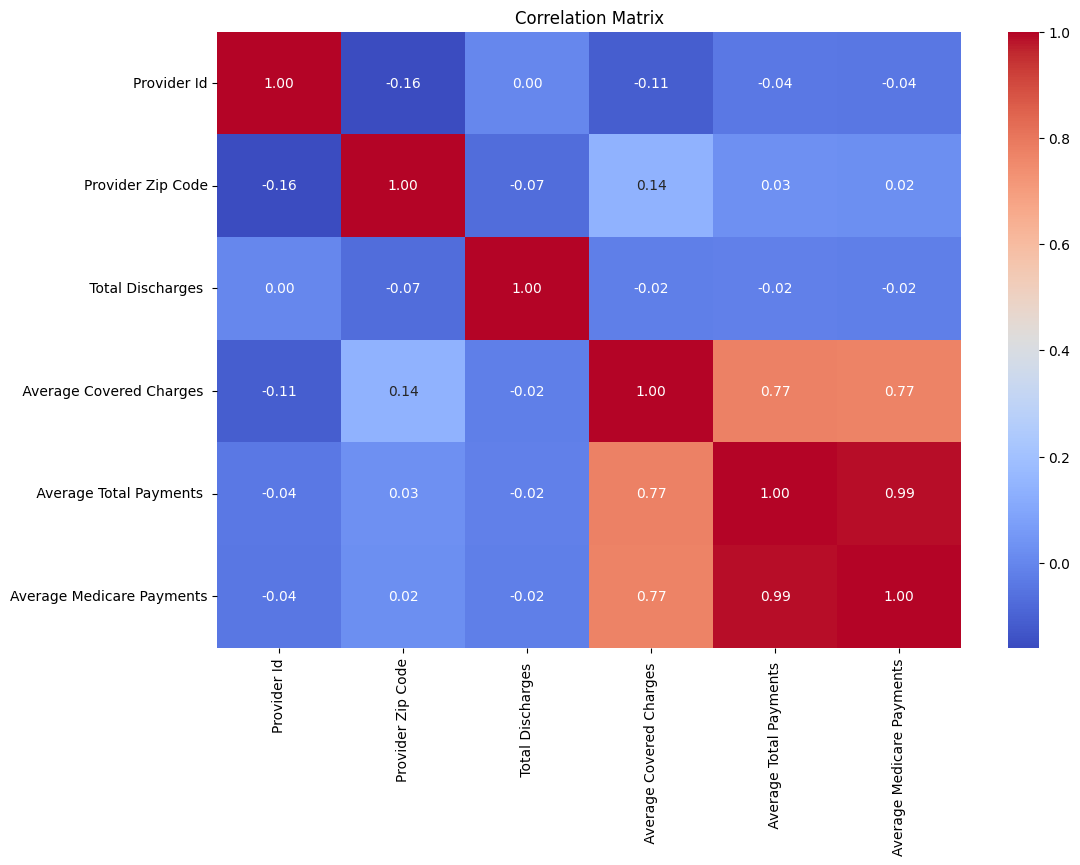

In [24]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr(method="pearson")

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Provider Id  Provider State  Provider Zip Code   Total Discharges   \
0        10001               1              36301                  91   
1        10005               1              35957                  14   
2        10006               1              35631                  24   
3        10011               1              35235                  25   
4        10016               1              35007                  18   

    Average Covered Charges    Average Total Payments   \
0                   32963.07                   5777.24   
1                   15131.85                   5787.57   
2                   37560.37                   5434.95   
3                   13998.28                   5417.56   
4                   31633.27                   5658.33   

   Average Medicare Payments  State_name  Region  DRG_code  Procedure_name  
0                    4763.73           1      67         0              27  
1                    4976.71           1      26         0

In [26]:
X = df.drop(columns=[' Average Total Payments '])
y = df[' Average Total Payments ']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [29]:
# Accuracy
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Training R² Score:", train_score)
print("Testing R² Score:", test_score)

Training R² Score: 0.9793545802359369
Testing R² Score: 0.9794103970516772
